In [7]:
import pandas as pd 
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("restaurantes_con_distrito_barrio.csv")
data

,id,Name,Address,Lat,Long,Number of Ratings,Restaurant Rating,Type of Restaurant,Number of Bookmarks,Price Range,Phone Number,Website,Instagram,Facebook,Timetable,url,NOMBRE_DISTRITO,NOMBRE_BARRIO
0,1,Freedom Cakes Diner,"Calle Cádiz 7,Madrid,Spain,28004",40.415876,-3.702805,470.0,4.5,['International'],766,Moderado,+34-910741347,http://www.freedomcakes.es/,http://www.instagram.com/freedomcakes,http://facebook.com/Freedomcakesvegan,"{'Monday': '08:00 - 00:00', 'Tuesday': '08:00 ...",https://www.happycow.net/reviews/freedom-cakes...,Centro,Sol
1,2,Mad Mad Vegan - Chueca,"Calle Pelayo 19,Madrid,Spain,28004",40.422698,-3.698609,410.0,5.0,"['American', 'Mexican']",612,Moderado,+34-914442077,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-madri...,Centro,Justicia
2,3,Frutas Prohibidas,"Calle del Conde Duque, 26,Madrid,Spain,28015",40.427467,-3.710349,241.0,5.0,"['International', 'Fusion']",555,Moderado,+34-911525533,http://www.frutasprohibidas.com/,http://www.instagram.com/frutasprohibidasbar,http://facebook.com/frutasprohibidasbar,"{'Monday': 'Closed', 'Tuesday': 'Closed', 'Wed...",https://www.happycow.net/reviews/frutas-prohib...,Centro,Universidad
3,4,Mad Mad Vegan - Lavapiés,"Lavapiés 16,Madrid,Spain,28012",40.411113,-3.703039,216.0,4.5,"['American', 'Mexican']",465,Moderado,+34-910665299,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-vegan...,Centro,Embajadores
4,5,Flower Burger,"Calle Luchana 13, Chamberí,Madrid,Spain,28010",40.430001,-3.701037,14.0,4.5,"['American', 'Western']",47,Barato,+34-910328968,https://www.flowerburger.it/,http://www.instagram.com/flowerburger_es,http://facebook.com/flowerburger.it,"{'Monday': '13:00 - 16:30, 19:30 - 23:30', 'Tu...",https://www.happycow.net/reviews/flower-burger...,Chamberi,Ríos Rosas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,744,Morgano Crafted Beers,"Alamo 2, Boadilla del Monte, Madrid, Spain, 28660",40.405759,-3.876917,1.0,4.0,"['Middle Eastern', 'Spanish']",2,Barato,+34-695635423,No website,No instagram,http://facebook.com/MorganoCraftedBeers,"{'Monday': '19:00 - 01:00', 'Tuesday': '19:00 ...",https://www.happycow.net/reviews/morgano-craft...,NaN,NaN
745,745,Adagio Gelateria,"Avenida de Adolfo Suárez, 7, Boadilla Del Mont...",40.405413,-3.876999,1.0,4.0,['Italian'],0,No price range,+34-912859853,No website,http://www.instagram.com/adagiogelateria,http://facebook.com/adagiogelateria,"{'Monday': '10:00 - 22:30', 'Tuesday': '10:00 ...",https://www.happycow.net/reviews/adagio-gelate...,NaN,NaN
746,746,La Huella Vegana,"Calle de las Trece Rosas, 2,Rivas-vaciamadrid,...",40.376390,-3.540020,31.0,4.5,"['Western', 'Spanish']",42,Moderado,+34-917139958,http://www.lahuellavegana.com/,No instagram,http://facebook.com/lahuellavegana,"{'Monday': '08:30 - 23:00', 'Tuesday': '08:30 ...",https://www.happycow.net/reviews/la-huella-riv...,NaN,NaN
747,747,Kamado,Calle Oslo 53CC (at X-Madrid Shopping Center)...,40.341716,-3.847447,3.0,2.5,['Asian'],2,Moderado,+34-917374775,http://kamadoasianfood.es/,No instagram,http://facebook.com/Kamadoasianfood,"{'Monday': '13:00 - 16:00, 20:00 - 23:00', 'Tu...",https://www.happycow.net/reviews/kamado-alcorc...,NaN,NaN


In [8]:
areas = data
areas = areas.dropna()
areas

,id,Name,Address,Lat,Long,Number of Ratings,Restaurant Rating,Type of Restaurant,Number of Bookmarks,Price Range,Phone Number,Website,Instagram,Facebook,Timetable,url,NOMBRE_DISTRITO,NOMBRE_BARRIO
0,1,Freedom Cakes Diner,"Calle Cádiz 7,Madrid,Spain,28004",40.415876,-3.702805,470.0,4.5,['International'],766,Moderado,+34-910741347,http://www.freedomcakes.es/,http://www.instagram.com/freedomcakes,http://facebook.com/Freedomcakesvegan,"{'Monday': '08:00 - 00:00', 'Tuesday': '08:00 ...",https://www.happycow.net/reviews/freedom-cakes...,Centro,Sol
1,2,Mad Mad Vegan - Chueca,"Calle Pelayo 19,Madrid,Spain,28004",40.422698,-3.698609,410.0,5.0,"['American', 'Mexican']",612,Moderado,+34-914442077,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-madri...,Centro,Justicia
2,3,Frutas Prohibidas,"Calle del Conde Duque, 26,Madrid,Spain,28015",40.427467,-3.710349,241.0,5.0,"['International', 'Fusion']",555,Moderado,+34-911525533,http://www.frutasprohibidas.com/,http://www.instagram.com/frutasprohibidasbar,http://facebook.com/frutasprohibidasbar,"{'Monday': 'Closed', 'Tuesday': 'Closed', 'Wed...",https://www.happycow.net/reviews/frutas-prohib...,Centro,Universidad
3,4,Mad Mad Vegan - Lavapiés,"Lavapiés 16,Madrid,Spain,28012",40.411113,-3.703039,216.0,4.5,"['American', 'Mexican']",465,Moderado,+34-910665299,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-vegan...,Centro,Embajadores
4,5,Flower Burger,"Calle Luchana 13, Chamberí,Madrid,Spain,28010",40.430001,-3.701037,14.0,4.5,"['American', 'Western']",47,Barato,+34-910328968,https://www.flowerburger.it/,http://www.instagram.com/flowerburger_es,http://facebook.com/flowerburger.it,"{'Monday': '13:00 - 16:30, 19:30 - 23:30', 'Tu...",https://www.happycow.net/reviews/flower-burger...,Chamberi,Ríos Rosas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,719,MAD - Breadway,"FCCH+VJ, Barajas (at Adolfo Suárez Madrid-Bara...",40.472222,-3.570932,1.0,3.0,['International'],0,Moderado,+34-933670000,https://www.aena.es/en/madrid-barajas-adolfo-s...,No instagram,No facebook,"{'Monday': '06:00 - 21:00', 'Tuesday': '06:00 ...",https://www.happycow.net/reviews/breadway-madr...,Barajas,Aeropuerto
736,736,MAD - La Place - T1,"Aeropuerto Madrid-Barajas, Av de la Hispanidad...",40.489515,-3.564276,1.0,1.0,['European'],2,Moderado,+34-932401515,No website,No instagram,No facebook,"{'Monday': '08:00 - 23:30', 'Tuesday': '08:00 ...",https://www.happycow.net/reviews/la-place-madr...,Barajas,Aeropuerto
737,737,Chök - Barajas,"Av de la Hispanidad, s/n, (at Adolfo Suárez M...",40.489562,-3.564313,1.0,4.0,"['Western', 'European']",0,No price range,No phone number,https://www.chok.shop/en,No instagram,http://facebook.com/ChokBcn,"{'Monday': '08:30 - 20:30', 'Tuesday': '08:30 ...",https://www.happycow.net/reviews/choek-madrid-...,Barajas,Aeropuerto
739,739,MAD - Kirei - T4,"Iberia - Terminal 4S, Madrid Airport, Madrid, ...",40.498332,-3.567598,5.0,4.0,"['Japanese', 'Asian']",2,Moderado,No phone number,No website,No instagram,No facebook,{'Horario': 'No hay horario'},https://www.happycow.net/reviews/kirei-madrid-...,Barajas,Aeropuerto


In [9]:
datos_necesarios = areas[["Lat", "Long", "Number of Ratings", "Restaurant Rating", "Number of Bookmarks", "NOMBRE_DISTRITO", "NOMBRE_BARRIO"]]
datos_necesarios

,Lat,Long,Number of Ratings,Restaurant Rating,Number of Bookmarks,NOMBRE_DISTRITO,NOMBRE_BARRIO
0,40.415876,-3.702805,470.0,4.5,766,Centro,Sol
1,40.422698,-3.698609,410.0,5.0,612,Centro,Justicia
2,40.427467,-3.710349,241.0,5.0,555,Centro,Universidad
3,40.411113,-3.703039,216.0,4.5,465,Centro,Embajadores
4,40.430001,-3.701037,14.0,4.5,47,Chamberi,Ríos Rosas
...,...,...,...,...,...,...,...
719,40.472222,-3.570932,1.0,3.0,0,Barajas,Aeropuerto
736,40.489515,-3.564276,1.0,1.0,2,Barajas,Aeropuerto
737,40.489562,-3.564313,1.0,4.0,0,Barajas,Aeropuerto
739,40.498332,-3.567598,5.0,4.0,2,Barajas,Aeropuerto


In [10]:
datos_necesarios.index = np.arange(0,len(datos_necesarios))
datos_necesarios

,Lat,Long,Number of Ratings,Restaurant Rating,Number of Bookmarks,NOMBRE_DISTRITO,NOMBRE_BARRIO
0,40.415876,-3.702805,470.0,4.5,766,Centro,Sol
1,40.422698,-3.698609,410.0,5.0,612,Centro,Justicia
2,40.427467,-3.710349,241.0,5.0,555,Centro,Universidad
3,40.411113,-3.703039,216.0,4.5,465,Centro,Embajadores
4,40.430001,-3.701037,14.0,4.5,47,Chamberi,Ríos Rosas
...,...,...,...,...,...,...,...
695,40.472222,-3.570932,1.0,3.0,0,Barajas,Aeropuerto
696,40.489515,-3.564276,1.0,1.0,2,Barajas,Aeropuerto
697,40.489562,-3.564313,1.0,4.0,0,Barajas,Aeropuerto
698,40.498332,-3.567598,5.0,4.0,2,Barajas,Aeropuerto


<Axes: ylabel='Frequency'>

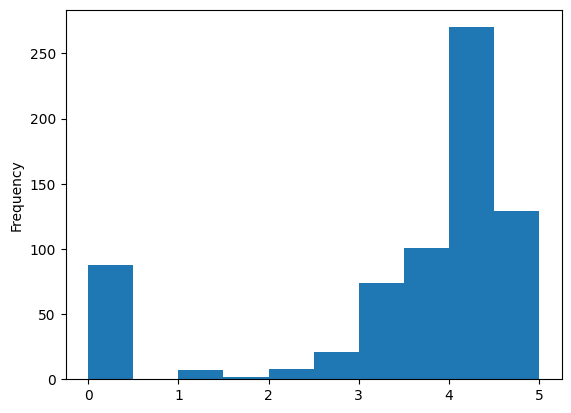

In [11]:
ratings = datos_necesarios["Restaurant Rating"].sort_values()
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
ratings.plot(kind="hist", bins=bins)

In [12]:
grupo_distrito = datos_necesarios.groupby("NOMBRE_DISTRITO").size()
grupo_distrito_bueno = grupo_distrito[grupo_distrito<=100]
lista_bueno_split = list(grupo_distrito_bueno.index)
print(lista_bueno_split)
grupo_distrito_demasiado = grupo_distrito[grupo_distrito>100]
lista_distritos_split = list(grupo_distrito_demasiado.index)
print(lista_distritos_split)

['Arganzuela', 'Barajas', 'Carabanchel', 'Chamartin', 'Chamberi', 'Ciudad Lineal', 'Fuencarral-El Pardo', 'Hortaleza', 'Latina', 'Moncloa-Aravaca', 'Moratalaz', 'Puente de Vallecas', 'Retiro', 'Salamanca', 'San Blas - Canillejas', 'Tetuan', 'Usera', 'Vicalvaro', 'Villa de Vallecas']
['Centro']


In [13]:
lista_barrios = []
for distrito in lista_distritos_split:
    restaurantes_distrito = datos_necesarios[datos_necesarios["NOMBRE_DISTRITO"] == distrito]
    grupo_barrio = restaurantes_distrito.groupby("NOMBRE_BARRIO").size()
    lista_barrios = lista_barrios + list(grupo_barrio.index)
    print(grupo_barrio)

print(lista_barrios)

NOMBRE_BARRIO
Cortes          41
Embajadores    102
Justicia        75
Palacio         37
Sol             39
Universidad     84
dtype: int64
['Cortes', 'Embajadores', 'Justicia', 'Palacio', 'Sol', 'Universidad']


In [14]:
juntar_distritos = {"Arganzuela": ["Arganzuela"], 
                    "Chamberi": ["Chamberi"], 
                    "Salamanca": ["Salamanca"], 
                    "Sector_Norte": ["Fuencarral-El Pardo", "Barajas", "Chamartin", "Hortaleza", "Tetuan"],
                    "Sector_Sureste": ["Ciudad Lineal", "Moratalaz", "Villa de Vallecas", "Vicalvaro", "Puente de Vallecas", "Retiro", "San Blas - Canillejas"],
                    "Sector_Suroreste": ["Carabanchel", "Latina", "Moncloa-Aravaca", "Usera"]}


modelo = MinMaxScaler(feature_range=(0, 1))

diccionario_grupos = {}
for distrito in juntar_distritos:
    data_frame = datos_necesarios[datos_necesarios["NOMBRE_DISTRITO"].apply(lambda x: x in juntar_distritos[distrito])]
    data_frame.index = np.arange(0, len(data_frame))
    data_frame["Number of Bookmarks"] = modelo.fit_transform(pd.DataFrame(data_frame["Number of Bookmarks"]))
    data_frame["Famous ratio"] = modelo.fit_transform(pd.DataFrame(data_frame["Number of Ratings"] * data_frame["Restaurant Rating"]))
    data_frame["Famous ratio"] = data_frame["Famous ratio"] + data_frame["Number of Bookmarks"]
    inicio_frontera_borrosa = data_frame["Famous ratio"].quantile(0.65)
    fin_frontera_borrosa = data_frame["Famous ratio"].quantile(0.8) 
    def calificacion(x):
        if x < inicio_frontera_borrosa:
            return 1
        elif inicio_frontera_borrosa <= x < fin_frontera_borrosa:
            return 2
        else:
            return 3
    data_frame["quality_classification"] = data_frame["Famous ratio"].map(calificacion)
    diccionario_grupos[distrito] = data_frame
diccionario_grupos["Sector_Norte"]

C:\Users\josej\AppData\Local\Temp\ipykernel_23240\3861135959.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame["Number of Bookmarks"] = modelo.fit_transform(pd.DataFrame(data_frame["Number of Bookmarks"]))
C:\Users\josej\AppData\Local\Temp\ipykernel_23240\3861135959.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame["Famous ratio"] = modelo.fit_transform(pd.DataFrame(data_frame["Number of Ratings"] * data_frame["Restaurant Rating"]))
C:\Users\josej\AppData\Local\Temp\ipykernel_232

,Lat,Long,Number of Ratings,Restaurant Rating,Number of Bookmarks,NOMBRE_DISTRITO,NOMBRE_BARRIO,Famous ratio,quality_classification
0,40.446800,-3.694500,3.0,4.0,0.193548,Tetuan,Cuatro Caminos,0.342617,3
1,40.448803,-3.706887,5.0,4.0,0.193548,Tetuan,Bellavista-Almenara,0.441996,3
2,40.449405,-3.695044,3.0,3.5,0.096774,Tetuan,Cuatro Caminos,0.227209,2
3,40.440991,-3.675436,3.0,3.5,0.032258,Chamartin,Prosperidad,0.162693,1
4,40.440991,-3.675436,2.0,4.0,0.064516,Chamartin,Prosperidad,0.163895,1
...,...,...,...,...,...,...,...,...,...
63,40.472222,-3.570932,1.0,3.0,0.000000,Barajas,Aeropuerto,0.037267,1
64,40.489515,-3.564276,1.0,1.0,0.064516,Barajas,Aeropuerto,0.076938,1
65,40.489562,-3.564313,1.0,4.0,0.000000,Barajas,Aeropuerto,0.049689,1
66,40.498332,-3.567598,5.0,4.0,0.064516,Barajas,Aeropuerto,0.312963,2


In [15]:
for barrio in lista_barrios:
    data_frame = datos_necesarios[datos_necesarios["NOMBRE_BARRIO"]==barrio]
    data_frame.index = np.arange(0,len(data_frame))
    data_frame["Number of Bookmarks"] = modelo.fit_transform(pd.DataFrame(data_frame["Number of Bookmarks"]))
    data_frame["Famous ratio"] = modelo.fit_transform(pd.DataFrame(data_frame["Number of Ratings"] * data_frame["Restaurant Rating"]))
    data_frame["Famous ratio"] = data_frame["Famous ratio"] + data_frame["Number of Bookmarks"]
    inicio_frontera_borrosa = data_frame["Famous ratio"].quantile(0.65)
    fin_frontera_borrosa = data_frame["Famous ratio"].quantile(0.8) 
    def calificacion(x):
        if x < inicio_frontera_borrosa:
            return 1
        elif inicio_frontera_borrosa <= x < fin_frontera_borrosa:
            return 2
        else:
            return 3
    data_frame["quality_classification"] = data_frame["Famous ratio"].map(calificacion)
    diccionario_grupos[barrio] = data_frame



C:\Users\josej\AppData\Local\Temp\ipykernel_23240\884636786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame["Number of Bookmarks"] = modelo.fit_transform(pd.DataFrame(data_frame["Number of Bookmarks"]))
C:\Users\josej\AppData\Local\Temp\ipykernel_23240\884636786.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame["Famous ratio"] = modelo.fit_transform(pd.DataFrame(data_frame["Number of Ratings"] * data_frame["Restaurant Rating"]))
C:\Users\josej\AppData\Local\Temp\ipykernel_23240\8

In [16]:
for grupo in diccionario_grupos:    
    print(grupo)

Arganzuela
Chamberi
Salamanca
Sector_Norte
Sector_Sureste
Sector_Suroreste
Cortes
Embajadores
Justicia
Palacio
Sol
Universidad


In [17]:
mapeo_distrito_barrio = {"Arganzuela": [0, 1], 
                         "Chamberi": [0, 6], 
                         "Salamanca": [0, 3], 
                         "Sector_Norte": [0, 7, 20, 4, 15, 5],
                         "Sector_Sureste": [0, 14, 13, 17, 18, 12, 2, 19],
                         "Sector_Suroreste": [0, 10, 9, 8, 11],
                         "Cortes": [1, 2],
                         "Embajadores": [1, 1],
                         "Justicia": [1, 3],
                         "Palacio": [1, 0],
                         "Sol": [1, 5],
                         "Universidad": [1, 4]}

madrid = gpd.read_file("Distritos.shp")
barrios_madrid = gpd.read_file("Barrios.shx")

madrid = madrid.set_crs("EPSG:25830", allow_override=True)
madrid = madrid.to_crs("EPSG:4326")


barrios_madrid = barrios_madrid.set_crs("EPSG:25830", allow_override=True)
barrios_madrid = barrios_madrid.to_crs("EPSG:4326")

C:\Users\josej\AppData\Local\Temp\ipykernel_23240\666381736.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_vectores_singulares["Lat"] = modelo.fit_transform(data_frame_vectores_singulares[["Lat"]])
C:\Users\josej\AppData\Local\Temp\ipykernel_23240\666381736.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_vectores_singulares["Long"] = modelo.fit_transform(data_frame_vectores_singulares[["Long"]])
C:\Users\josej\AppData\Local\Temp\ipykernel_23240\666381736.py:23: SettingWithCo

<Figure size 600x600 with 0 Axes>

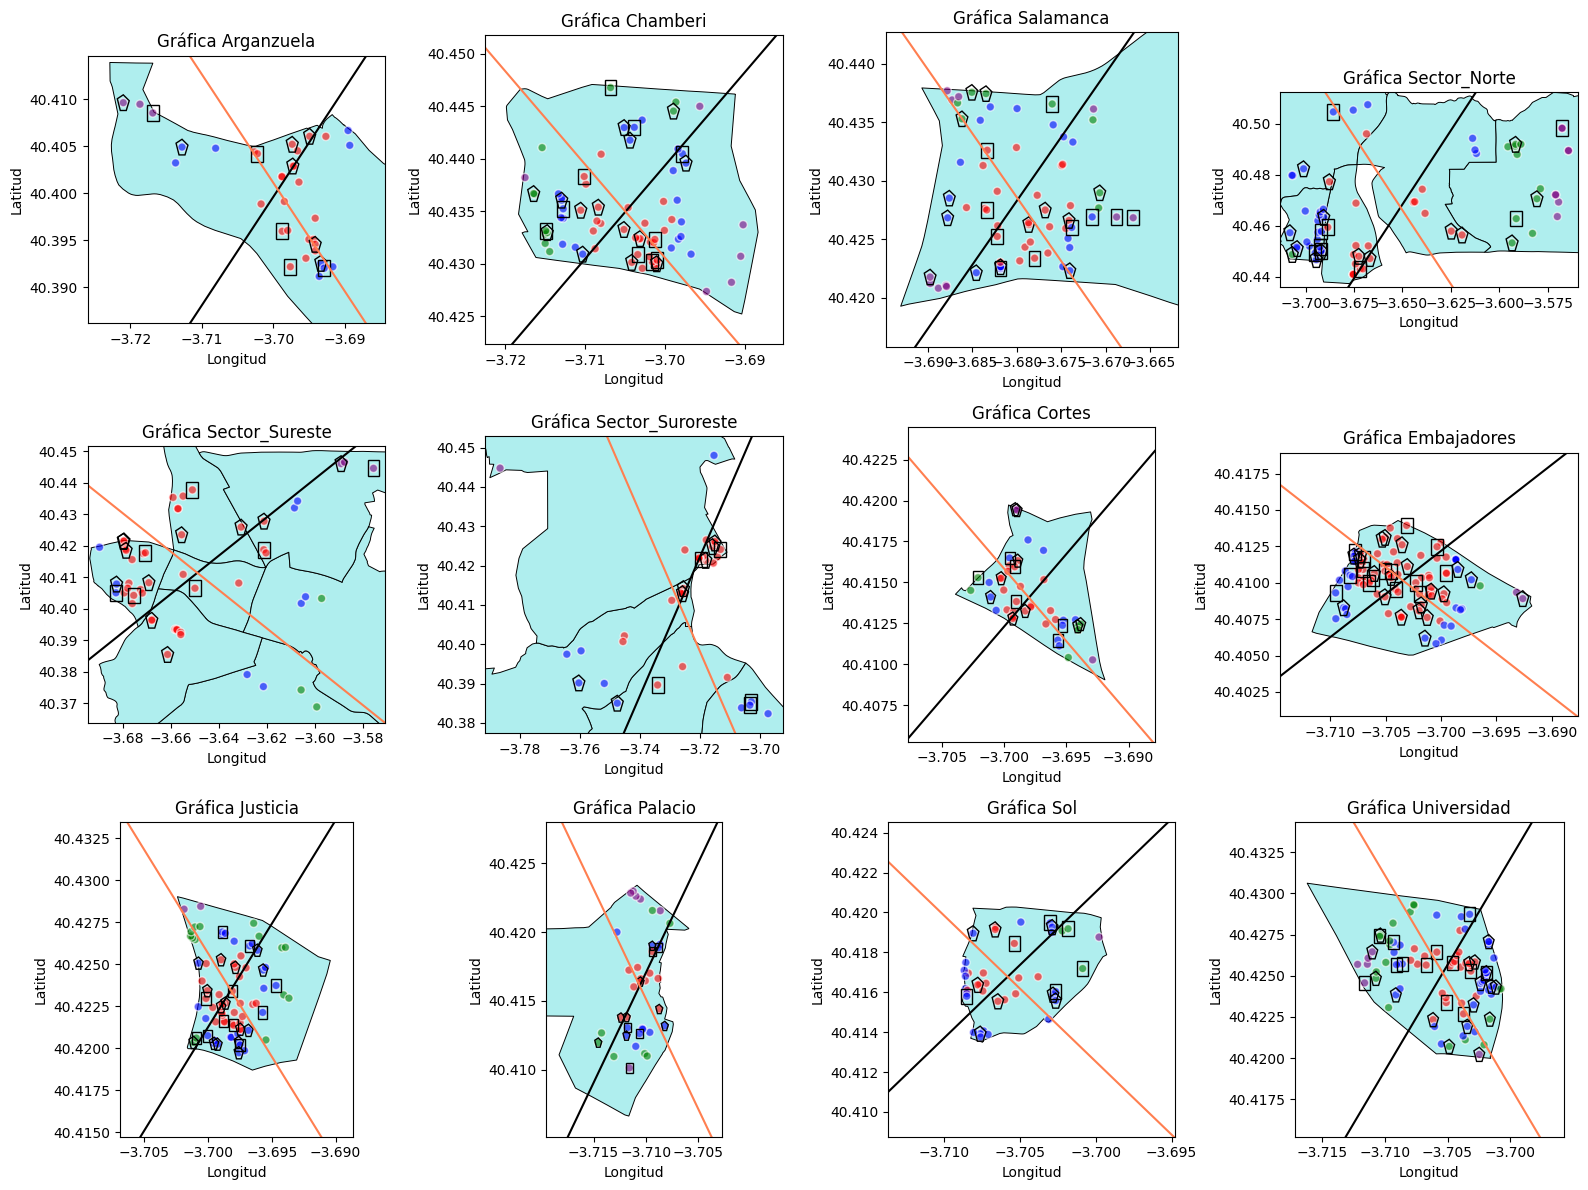

In [31]:
plt.figure(figsize=(6,6))
fig, axs = plt.subplots(3, 4, figsize=(16, 12)) 
axs = axs.flatten() 
index = 0
for grupo in diccionario_grupos:
    barrio = diccionario_grupos[grupo]
    data_frame_barrio = barrio[["Lat", "Long"]]
    matriz_barrio = np.asmatrix(data_frame_barrio)

    data_frame_vectores_singulares = barrio[["Lat", "Long", "quality_classification"]]
    data_frame_vectores_singulares["Lat"] = modelo.fit_transform(data_frame_vectores_singulares[["Lat"]])
    data_frame_vectores_singulares["Long"] = modelo.fit_transform(data_frame_vectores_singulares[["Long"]])
    data_frame_vectores_singulares = data_frame_vectores_singulares[data_frame_vectores_singulares["quality_classification"] > 1]
    matriz_barrio_vectores = np.asmatrix(data_frame_vectores_singulares[["Lat", "Long"]])
    [U, S, V] = np.linalg.svd(matriz_barrio_vectores)

    area_dominio_cada_barrio = np.array([])
    for i in range(matriz_barrio.shape[0]):
        barrio_i = matriz_barrio[i,:]
        potencial = np.linalg.norm(matriz_barrio-barrio_i)
        area_dominio_cada_barrio = np.append(area_dominio_cada_barrio, potencial)
    area_dominio_cada_barrio = pd.Series(area_dominio_cada_barrio)
    barrio["Potencial"] = area_dominio_cada_barrio
    maximo = barrio["Potencial"].max()
    minimo = barrio["Potencial"].min()
    cuarta = (maximo-minimo)/4

    def colorear(x):
        if minimo <= x < minimo + cuarta:
            return "red"
        elif minimo + cuarta <= x < minimo + 2*cuarta:
            return "blue"
        elif minimo + 2*cuarta <= x < minimo + 3*cuarta:
            return "green"
        else:
            return "purple"

    def quality(x):
        if x == 2:
            return "cuadrado"
        elif x == 3:
            return "pentagono"

    barrio["color"] = barrio["Potencial"].map(colorear)


    x_max = np.max(data_frame_barrio["Long"])+0.005
    x_min = np.min(data_frame_barrio["Long"])-0.005
    y_max = np.max(data_frame_barrio["Lat"])+0.005
    y_min = np.min(data_frame_barrio["Lat"])-0.005

    contorno = (x_max-x_min)*0.02
    contorno_mitad = contorno/2
    contorno_pentagono = contorno_mitad/2
    # Crear un gráfico de dispersión para las pelotas

    ax = axs[index]
    
    zona = mapeo_distrito_barrio[grupo]
    if zona[0] == 0:
        lugar = madrid.iloc[zona[1:len(zona)]]
    else:
        lugar = barrios_madrid.iloc[zona[1:len(zona)]]

    lugar.plot(linewidth=0.7, ax=ax, edgecolor='black', color="paleturquoise")
    ax.scatter(np.array(data_frame_barrio["Long"]), np.array(data_frame_barrio["Lat"]), c=np.array(barrio["color"]),alpha=0.6, edgecolors="w", linewidth=1)

    for i in range(len(barrio)):
        if quality(barrio.loc[i,"quality_classification"]) == "cuadrado":
            polygon = plt.Polygon([(barrio.loc[i,"Long"]-contorno, barrio.loc[i, "Lat"]-contorno), 
                                (barrio.loc[i,"Long"]+contorno, barrio.loc[i, "Lat"]-contorno), 
                                (barrio.loc[i,"Long"]+contorno, barrio.loc[i, "Lat"]+contorno), 
                                (barrio.loc[i,"Long"]-contorno, barrio.loc[i, "Lat"]+contorno)], closed=True, fill=None, edgecolor='k')
            ax.add_patch(polygon)
        elif quality(barrio.loc[i,"quality_classification"]) == "pentagono":
            polygon = plt.Polygon([(barrio.loc[i,"Long"], barrio.loc[i, "Lat"]+contorno),
                                (barrio.loc[i,"Long"]-contorno, barrio.loc[i, "Lat"]+contorno_mitad), 
                                (barrio.loc[i,"Long"]-contorno_mitad, barrio.loc[i, "Lat"]-contorno), 
                                (barrio.loc[i,"Long"]+contorno_mitad, barrio.loc[i, "Lat"]-contorno), 
                                (barrio.loc[i,"Long"]+contorno, barrio.loc[i, "Lat"]+contorno_pentagono)], closed=True, fill=None, edgecolor='k')
            ax.add_patch(polygon)

    center_x = np.mean(data_frame_barrio["Long"])
    center_y = np.mean(data_frame_barrio["Lat"])

    # Crear las rectas ajustadas al centro
    # Ajuste de las rectas, desplazando hacia el centro
    x = np.linspace(x_min, x_max, 20000)  # Definir el rango de X para las rectas
    y1 = (V[0, 1] / V[0, 0]) * (x - center_x) + center_y
    y2 = (V[1, 0] / V[1, 1]) * (x - center_x) + center_y

    ax.plot(x, y1, color="k")
    ax.plot(x, y2, color="coral")

    # Ajustar los límites de los ejes
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Añadir título y etiquetas
    ax.set_title(f"Gráfica {grupo}")
    ax.set_xlabel("Longitud")
    ax.set_ylabel("Latitud")
    
    index += 1

plt.tight_layout()
plt.savefig("figura_completa.png")
plt.show()


